# Lab 1: Environment Setup and Testing

In this lab you will set up your Azure AI Foundry resource and project, deploy essential language and embedding models, create necessary services, and setup necessary permissions and configurations.Finally, you’ll validate your setup by sending a test chat completion to your deployed model, ensuring your environment is ready for AI agent development in subsequent labs.

NOTE: **Be sure you have the necessary pre-requisites setup**, as outlined in the [Project README](README.md) document, before proceeding to step 1.

#### Step 1: Create AI Foundry Resource and project in Azure AI Foundry </h4>

In this lab we will be setting up and using an Azure AI Foundry resource instead of a AI hub resource. This new resource type in Azure AI Foundry is for designing, customizing, and managing AI apps and agents at scale. You will have access to the latest industry models using a serverless hosting model. This resource is recommended for most applications you build in Azure AI Foundry. NOTE: these labs are only compatible with the Azure AI Foundry resource type, which leverage the latest SDKs. These labs will not work with the older AI Hub resource type.

1. Navigate to Azure AI Foundry at **https://ai.azure.com**
2. If you do not already have an Azure AI Foundry resource and project stood up, select **'Create new'** at the top right of the screen
3. Select **'Azure AI Foundry resource'** and click next

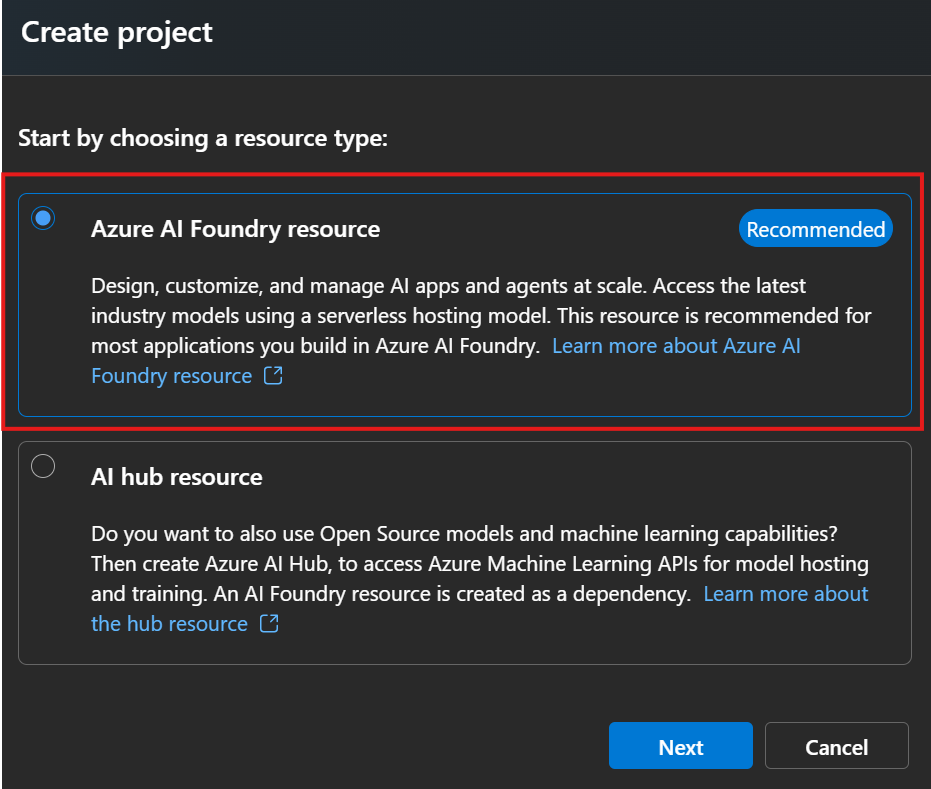

4. On the **'Create a project'** page, give your project a name. Expand the advanced options. Select the appropriate values and re-name resources as needed. Click 'Create'. NOTE: Once your resource and project are created, additional data, privacy, and security policies can be applied or modified in the Azure portal as needed.

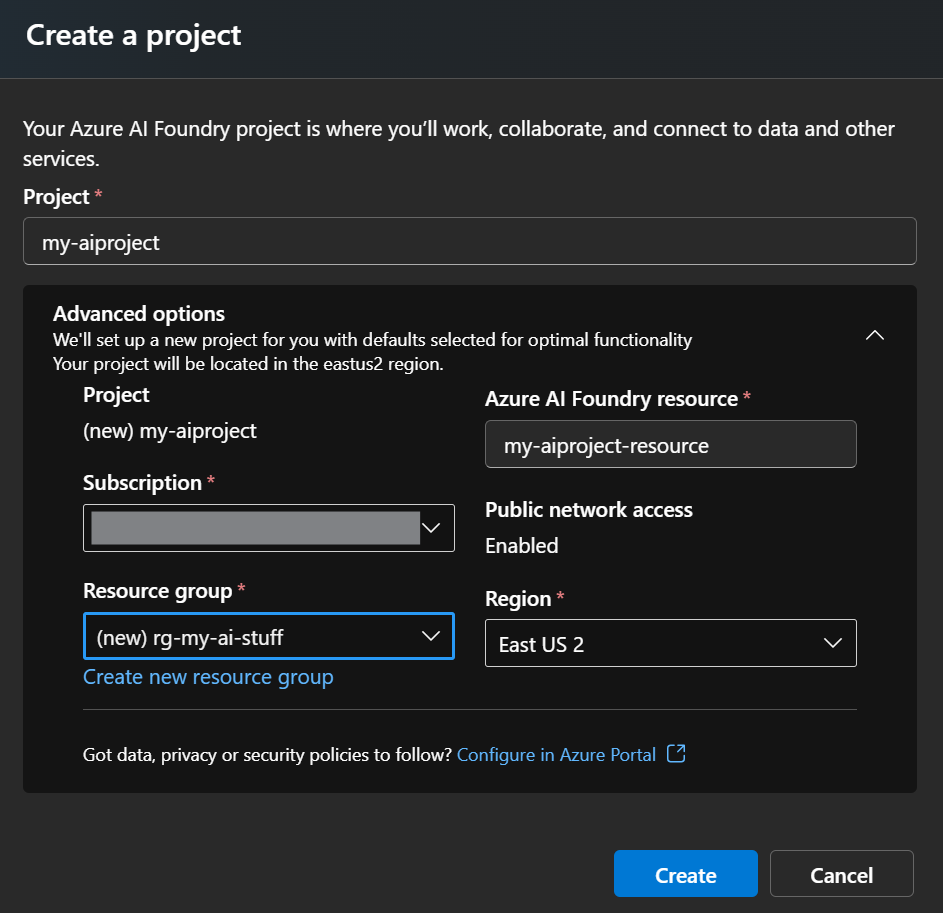

#### Step 2: Create an Azure AI Search service

We will be using Azure AI search in these labs, so we need to set this up too. Navigate to the same resource group where you created your AI project and create a new Azure AI Search service resource.

1. It is recommended to create the search service in the same region as your AI project
2. Select 'Standard' tier, which is required for these labs

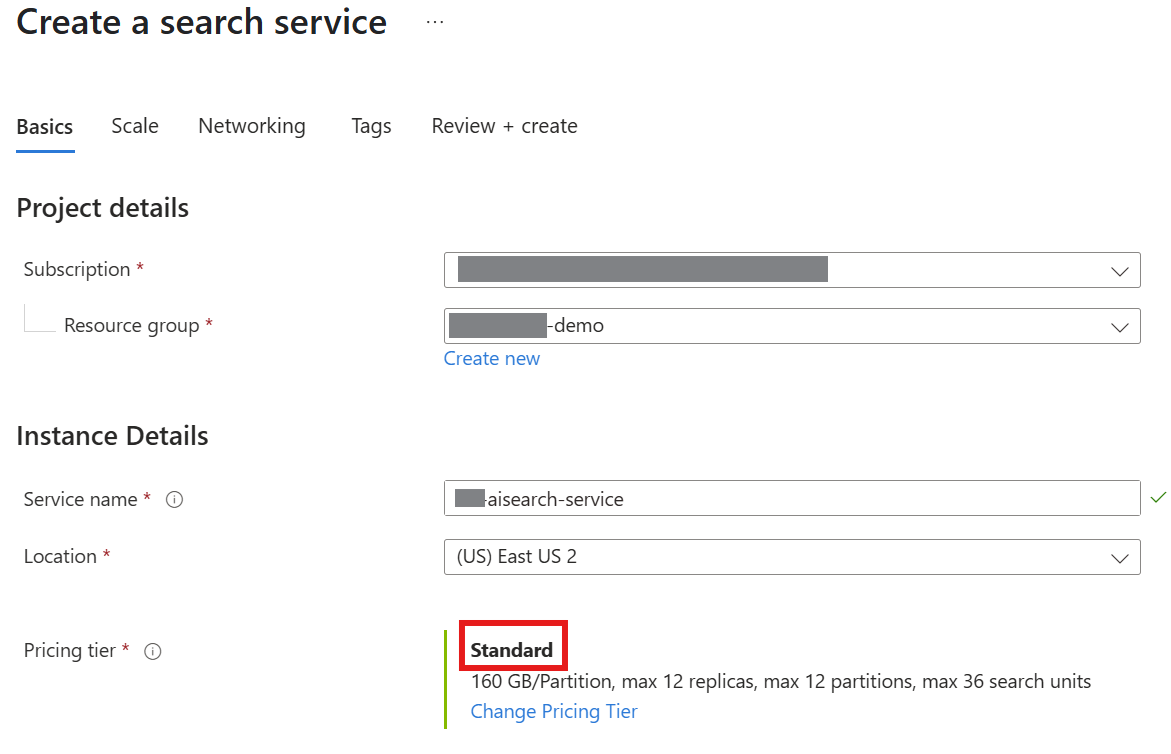

3. Navigate to your search service once it is created. Under Settings > Keys, ensure 'Both' is selected for API access control. Click save.

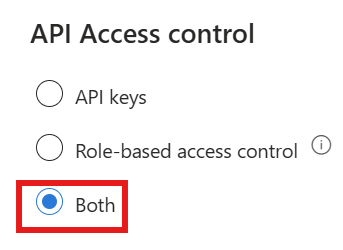

4. Navigate to Settings > Identity > turn on system-assigned identity and click save.

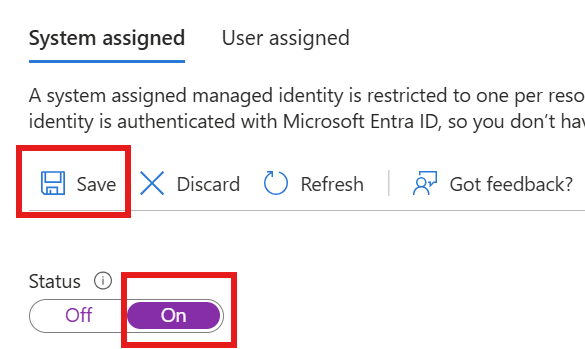

#### Step 3: Create a chat model deployment in your AI project

If you are working in a project team with 2 or more members, only one person needs to perform the below steps. Once deployed, this model will be available to everyone in the project to use. For learning purposes, you can screenshare this part of the setup to your project team.

1. In your AI Foundry project, under 'My assets' section, click on the **'Models + endpoints'**.
2. Click on **'Deploy model'** and **'Deploy base model'**.
3. Select gpt-4o* and then press **Confirm**.
4. Select **Customize** and set the **Model version** to 2024-08-06 and the **Tokens per Minute Rate Limit** to 200k.

*If you experience quota issues during deployment, you can opt to use Gpt-4.1 instead.

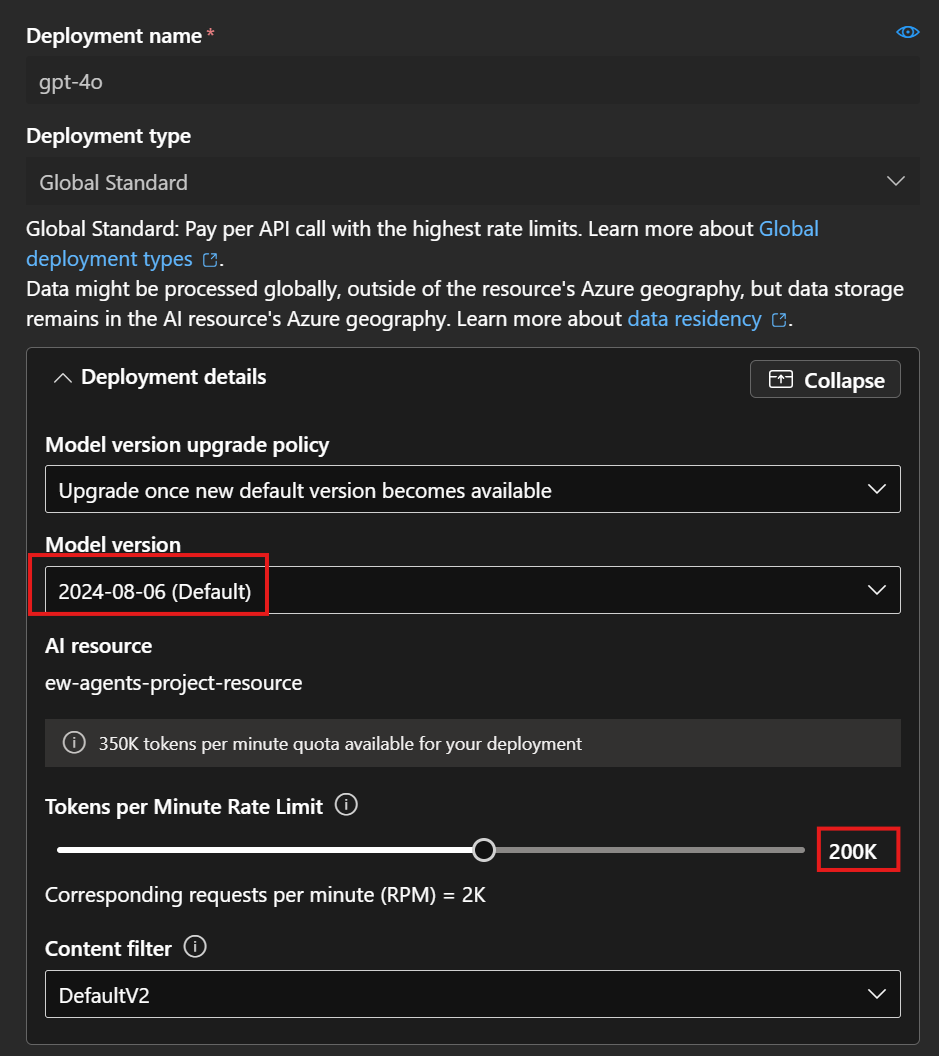



#### Step 4: Create an Azure OpenAI service and deploy an embedding model

The import and vectorize wizard in Azure AI Search, which will be used in subsequent labs, does not yet support text embedding models within your AI Foundry resource project. Because of this, we need to create an Azure OpenAI service and deploy a text embedding model there. We will use this text embedding model later to vectorize our health plan documents.

1. Navigate to the same resource group where you created your AI project and create a new Azure OpenAI service resource.
2. In your newly created Azure OpenAI service, click Go to Azure AI Foundry portal. Notice that this is outside of your project.
3. Under the My assets section, click on the Models + endpoints.
4. Click on Deploy model and then Deploy base model.
5. Select text-embedding-3-large and deploy it. This will be used later to create the vector embeddings for our health plan documents.

#### Step 5: Create a Storage Account

We need to create a storage account and within it, storage container, which will store our health plan documents. This is where our Azure AI Search service will retrieve our health plan documents from. Navigate to the same resource group where you created your AI project and create a new Storage Account resource. The storage container will be created during Lab 4.

![Sample Photo](images/create-SA.jpg)

#### Step 6: Create a Grounding with Bing Search service

Under the same resource group, create a Grounding with Bing Search service

#### Step 7: Required permissions for labs


##### Managed-identity permissions:

The next steps are needed for the AI search resource to be able to vectorize the health plan documents in Lab 4:

1. Navigate to the **Storage Account** that was created above. **Assign the 'Storage Blob Data Reader role' to the search service identity**, as shown here:

![Sample Photo](images/blob-roleassign.jpg)


2. Navigate to your **Azure AI Search resource** that was created above. **Assign two roles to your project's managed identity: the 'Search Index Data Reader' role and the 'Search Service Contributor' role**, as shown below.

![Sample Photo](images/aisearch-role-assign1.jpg)

![Sample Photo](images/aisearch-role-assign2.jpg)

3. Navigate to your **Azure OpenAI resource** that was created above. **Assign the 'Cognitive Services OpenAI User' role to the search service identity**. To do this, select Access control > Add+ Role assignment > select Cognitive Services OpenAI User role > next select the managed identity of your search service > create role assignment.

##### User permissions:

**If you have contributor or higher permissions on a resource group, you inherit these user permissions and DO NOT need to add the below role assignments**, you can proceed to the next step. Otherwise, if you are a user, check to ensure the below role assignments are added for you.

TIP: if you are working on project teams and need to assign permissions to multiple users, you can add these permissions faster by creating a Entra ID security group (so you do not have to add users one-by-one) and by running Azure CLI scripts in Azure Cloud Shell.

1. At a minimum, users running these labs should have a **Reader role assigned on the Azure Subscription level**. In the Azure Portal, navigate to the Azure Subscription in which your resource group lives. On the left pane, select Access control > Role assignments. Filter 'Scope' to 'This resource'. Review user account permissions. If this is not asssigned, add this role assignment to the user.

2. **Each user needs to be granted the 'Cognitive Services OpenAI Contributor' role on the Azure AI Foundry resource**. To do this, in the Azure Portal, navigate to the Azure AI Foundry resource, select Access control > Add+ Role assignment > select Cognitive Services OpenAI Contributor role > next select the user(s) > create role assignment.

3. **Each user needs to be granted the 'Azure AI Project Manager' role on the Azure AI Foundry resource**. To do this, in the Azure Portal, navigate to the Azure AI Foundry resource, select Access control > Add+ Role assignment > select Azure AI Project Manager role > next select the user(s) > create role assignment. 

4. **Each user needs to be granted the 'Azure AI Project Manager' role in their resprective Azure AI Foundry project**. To do this, in the Azure Portal, navigate to the appropriate Foundry project, select Access control > Add+ Role assignment > select Azure AI Project Manager role > next select the user(s) > create role assignment. Repeat this process, as necessary, for all of the Foundry projects within your Foundry Resource.

5. **Each user needs to be granted the 'Storage Blob Data Contributor' role on the Storage Account**. To do this, add another role assignment > select Storage Blob Data Contributor role > next select the user(s) > create role assignment.

6. **Each user needs to be granted the 'Search Service Contributor' role on the Azure AI Search resource**. To do this, add another role assignment > select Search Service Contributor role > next select the user(s) > create role assignment.

#### Step 8: Install dependencies, create a virtual environment, and create an environment variables file

1. Open a new terminal and navigate to the AZURE-AI-AGENTS-LABS project directory if you are not there already. Run the below commands to create and activate your Python virtual environment:
    
    In powershell terminal (Windows):        
    ```bash
    python -m venv venv
    venv/Scripts/activate
    ```

    In zsh terminal (Mac):
    ```bash
    python -m venv venv
    source venv/bin/activate
    ```
    
    In bash terminal (Github Codespaces):
    ```bash
    python -m venv venv
    venv/bin/activate
    ```

2. Still in the AZURE-AI-AGENTS-LABS project directory, run the below command in your terminal. This installs all the required packages:
    
    ```bash
    pip install -r requirements.txt
    ```
    NOTE: If you are running this on a Mac and get an error regarding the installation of the pywin package, simply navigate to the requirements.txt file, comment out the package as shown below, save requirements.txt and run the above command again to finish install the remaining packages.

    ```python
    #pywin32==308
    ```

    NOTE: if there are any additional package dependecies that require installation, VS Code will prompt you to install these. If asked, go ahead and install.

3. Still in the AZURE-AI-AGENTS-LABS project directory, run the below command in your terminal. This creates your .env file:
    
    ```bash
    cp sample.env .env
    ```

4. Locate your newly created .env file and upate it with your environment variables:
    - Replace 'AIPROJECT_ENDPOINT' in your .env with your Azure AI Foundry project endpoint and 'API_KEY' with your API key, both of which can found in the the **Overview** page of your project:
    
    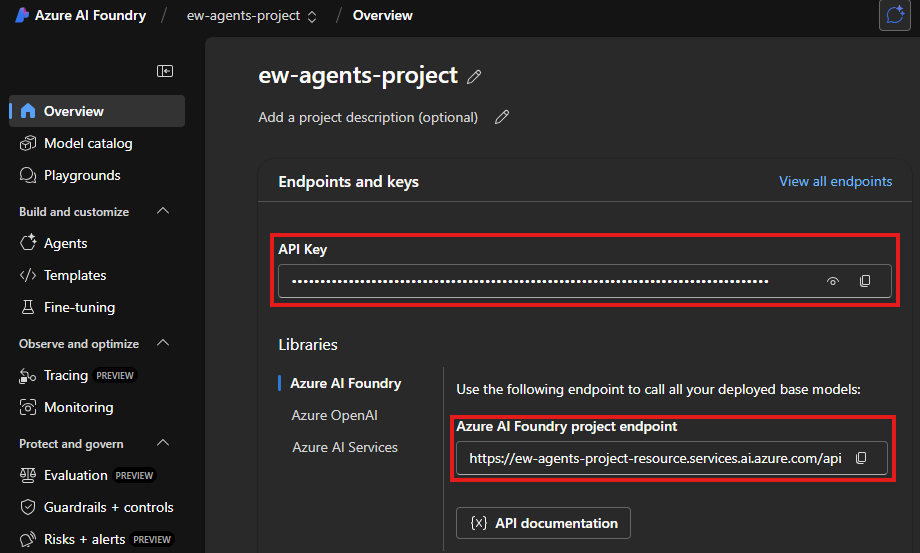

    - You also need to update 'CHAT_MODEL' in your .env with your gpt-4o model deployment name and update 'CHAT_MODEL_ENDPOINT' in your .env with your model endpoint, both of which can be found in the **Models + endpoints** under **My assets**. Click on the `gpt-4o` model that you have deployed and you will see these values:

    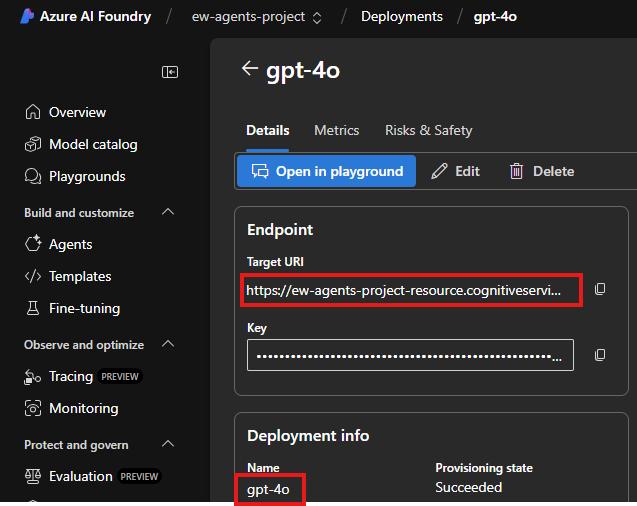

5. **Save your .env file** after updating.
6. Once your .env file is saved, click 'restart' at the top of this notebook to **restart the kernel**. This clears all variables, imports, and state from memory, and starts a fresh Python process, making sure our code is using the latest values.

    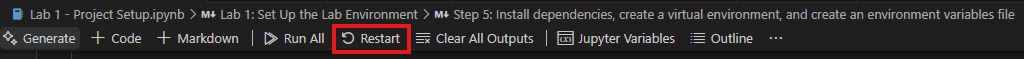

### Step 9: Login to your Azure subscription

In your terminal, run the below CLI command to login to your Azure account. When prompted, select your subscription. This allows us to use the token-based authentication method, DefaultAzureCredential, which is required for subsequent labs. Key-based authentication, using the AzureKeyCredential method, may also work, but the code in the labs will need to be refactored accordingly.

```bash
az login
```

### Step 10: Test your lab environment

To test that your lab was setup successfully, run the below code that sends a message to the deployed model, asking it to tell a joke.

In [4]:
# Import packages
import os
from azure.ai.projects import AIProjectClient
from azure.core.credentials import AzureKeyCredential
from azure.identity import DefaultAzureCredential
from dotenv import load_dotenv

load_dotenv() # Load environment variables from .env file

True

##### Option #1 (preferred method): Using token-based authentication using DefaultAzureCredential

This method is recommended because it provides secure, seamless authentication using your Azure login and supports best practices for managing credentials in both development and production environments. Also, these labs were built using DefaultAzureCredential, so using this method will be the easiest approach for running the code in subsequent labs.


In [5]:
project = AIProjectClient(
    endpoint=os.getenv("AIPROJECT_ENDPOINT"),
    credential=DefaultAzureCredential()
)

##### Option #2 (only use if token-based authentication is unavailable): Using key-based authentication with AzureKeyCredential

This method is not recommended for production scenarios because it requires managing and exposing API keys, which is less secure and more difficult to maintain than token-based authentication. Even if you use this approach in these labs, you may need to modify code in other notebooks to ensure they use AzureKeyCredential instead of DefaultAzureCredential.

##### Chat with your model

This code sends a chat message to your deployed model and prints the AI's response, allowing you to verify your environment is working correctly.


In [6]:
# Chat with the gpt-4o model
# Make sure you run the above code cell to instantiate the client first
chat = project.inference.get_chat_completions_client()
response = chat.complete(
    model=os.getenv("CHAT_MODEL"), # gpt-4o model from your project
    messages=[
        {
            "role": "system",
            "content": "You are an AI assistant that tells jokes for toddlers.",
        },
        {"role": "user", "content": "Hey, can you tell a joke about teddy bear?"},
    ],
)

print(response.choices[0].message.content)

Why did the teddy bear say no to dessert? Because it was already stuffed! 🐻🍰
